In [2]:
import os
os.chdir('/home/roeland/IdeaProjects/dai2/')
import warnings
warnings.simplefilter(action='ignore', category=[FutureWarning, DeprecationWarning])


import pandas as pd
import math
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', None)

# 1 Introduction

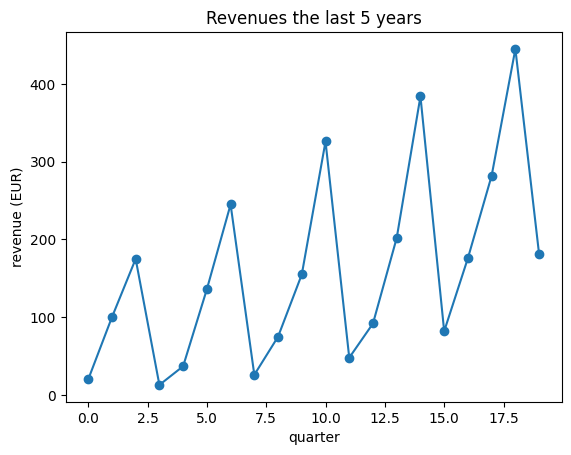

In [5]:
revenues = [20, 100, 175, 13, 37, 136, 245, 26, 75, 155, 326, 48, 92, 202, 384, 82, 176, 282, 445, 181]

plt.figure()
plt.plot(range(0, len(revenues)), revenues, 'o-')  ## 'o-':  to get dots for the data points and lines between them
plt.xlabel('quarter')
plt.ylabel('revenue (EUR)')
plt.title('Revenues the last 5 years')
plt.show()

# 2 Forecasting – based on the past

## 2.1 Naive Forcasting

In [3]:
def naiveForecasting(past):
    if (len(past) < 1):
        return math.nan
    return past[len(past) - 1]

naiveForecasting(revenues)

181

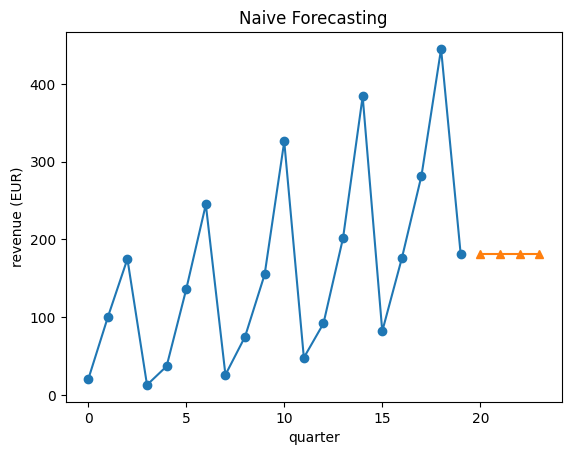

In [6]:
## Naive forecastings for the next 4 quarters:
past = revenues
predicted = []
for i in range(0, 4):
    next = naiveForecasting(past)
    predicted = predicted + [next]
    past = past + [next]

plt.figure()
n = len(revenues)
plt.plot(range(0, n), past[0:n], 'o-')
plt.plot(range(n, len(past)), past[n:len(past)], '^-')
plt.xlabel('quarter')
plt.ylabel('revenue (EUR)')
plt.title('Naive Forecasting')
plt.show()

## 2.2 Average of previous values

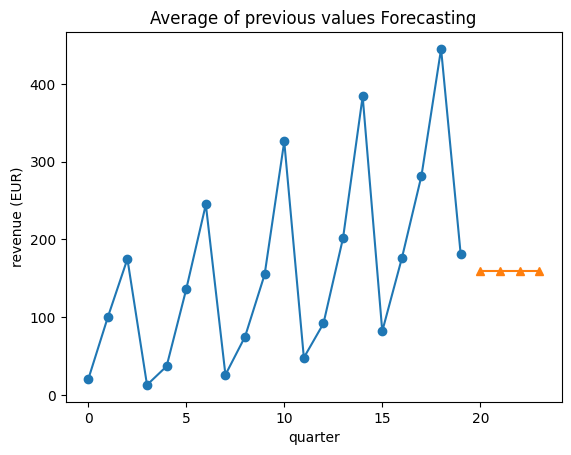

In [7]:
def averageForecasting(past):
    if (len(past) < 1):
        return math.nan
    return pd.Series(past).mean()


averageForecasting(revenues)
## Average for previous values for the next 4 quarters:
past = revenues
predicted = []
for i in range(0, 4):
    next = averageForecasting(past)
    predicted = predicted + [next]
    past = past + [next]

plt.figure()
n = len(revenues)
plt.plot(range(0, n), past[0:n], 'o-')
plt.plot(range(n, len(past)), past[n:len(past)], '^-')
plt.xlabel('quarter')
plt.ylabel('revenue (EUR)')
plt.title('Average of previous values Forecasting')
plt.show()

## 2.3 Moving average

In [0]:
def movingAverageForecasting(period):
    def result(past):
        n = len(past)
        if (n < period):
            return math.nan
        return pd.Series(past[(n - period):n]).mean()

    return result


forecast = movingAverageForecasting(4)
forecast(revenues)
#OR::
movingAverageForecasting(4)(revenues)

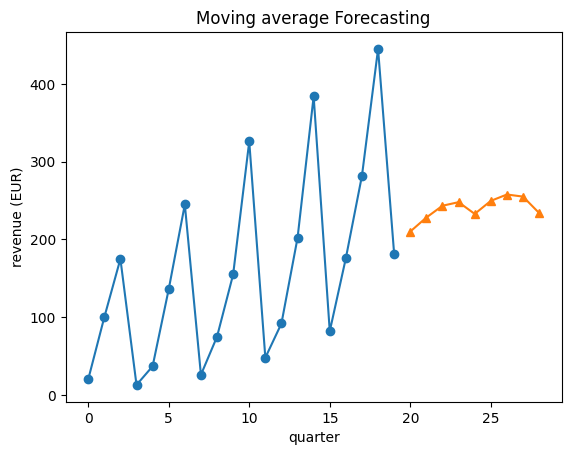

In [48]:
##Moving average for the next 4 quarters:
forecast = movingAverageForecasting(4)
past = revenues
predicted = []
for i in range(0, 4):
    next = forecast(past)
    predicted = predicted + [next]
    past = past + [next]

plt.figure()
n = len(revenues)
plt.plot(range(0, n), past[0:n], 'o-')
plt.plot(range(n, len(past)), past[n:len(past)], '^-')
plt.xlabel('quarter')
plt.ylabel('revenue (EUR)')
plt.title('Moving average Forecasting')
plt.show()

## 2.4 Linear combination

287.94640003946205

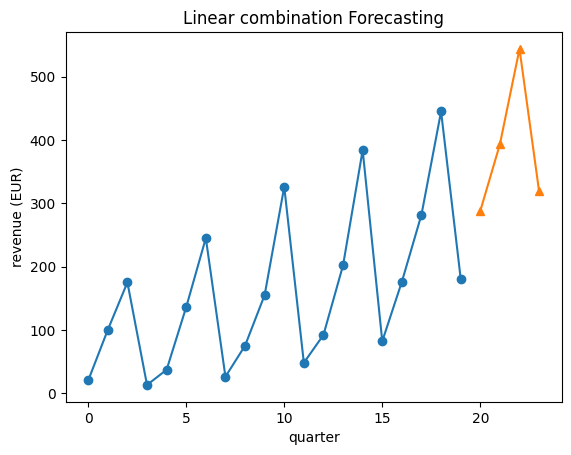

In [13]:
def calculateWeights(period, past):
    ## Calculate weights -system of m equations with m unknowns-:
    n = len(past)
    if (n < 2 * period):
        return math.nan
    v = []
    v = past[(n - 2 * period):(n - period)]
    for i in range(2, period + 1):
        v = v + past[(n - 2 * period + i - 1):(n - period + i - 1)]
    M = np.array(v).reshape(period, period)
    v = past[(n - period):n]
    return np.linalg.solve(M, v)


def linearCombinationForecasting(period):
    def result(past):
        n = len(past)
        if (n < 2 * period):
            return math.nan
        a = calculateWeights(period, past)  # see Chapter 8
        return (past[(n - period):n] * a).sum()

    return result


forecast = linearCombinationForecasting(4)
fc=forecast(revenues);display(fc)

##Linear combination forecast for the next 4 quarters:
forecast = linearCombinationForecasting(4)
past = revenues
predicted = []
for i in range(0, 4):
    next = forecast(past)
    predicted = predicted + [next]
    past = past + [next]

plt.figure()
n = len(revenues)
plt.plot(range(0, n), past[0:n], 'o-')
plt.plot(range(n, len(past)), past[n:len(past)], '^-')
plt.xlabel('quarter')
plt.ylabel('revenue (EUR)')
plt.title('Linear combination Forecasting')
plt.show()


# 3 Reliability

In [14]:
revenues = [20, 100, 175, 13, 37, 136, 245, 26, 75, 155, 326, 48, 92, 202, 384, 82, 176, 282, 445, 181]

def calculatePreviousForecasting(past, predictor):
    predicted = []
    n = len(past)
    for i in range(0, n):
        predicted = predicted + [predictor(past[0:i])]
    return predicted

## 3.1 Naive forecasting

MAE=  137.42105263157896
RMSE=  158.6978260720669
MAPE=  2.0702566894377608


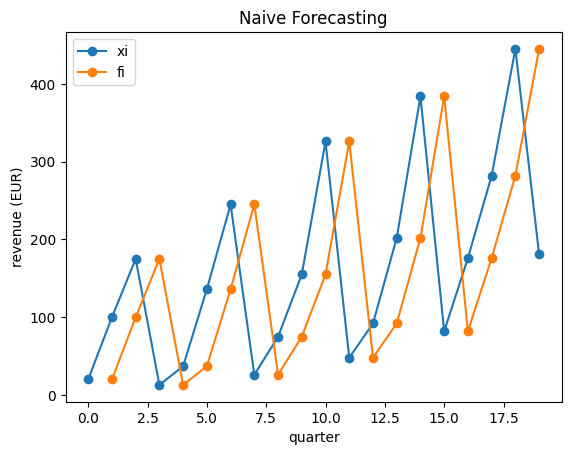

In [15]:
predicted = calculatePreviousForecasting(revenues, naiveForecasting)
errors = pd.Series(predicted) - revenues
MAE = errors.abs().mean()
print('MAE= ', MAE)
RMSE = math.sqrt((errors ** 2).mean())
print('RMSE= ', RMSE)
MAPE = (errors / revenues).abs().mean()
print('MAPE= ', MAPE)

plt.figure()
plt.plot(range(0, len(revenues)), revenues, 'o-', label='xi')
plt.plot(range(0, len(revenues)), predicted, 'o-', label='fi')
plt.xlabel('quarter')
plt.ylabel('revenue (EUR)')
plt.title('Naive Forecasting')
plt.legend()
plt.show()

## 3.2 Average of previous values forecasting

MAE=  103.00479631081717
RMSE=  130.8062074557378
MAPE=  1.0362196895855293


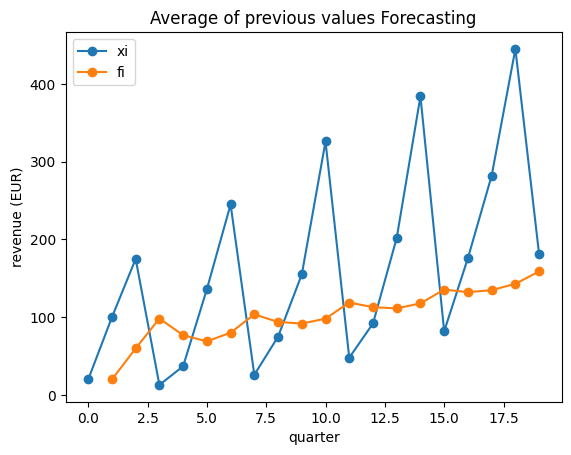

In [16]:
predicted = calculatePreviousForecasting(revenues, averageForecasting)
errors = pd.Series(predicted) - revenues
MAE = errors.abs().mean()
print('MAE= ', MAE)
RMSE = math.sqrt((errors ** 2).mean())
print('RMSE= ', RMSE)
MAPE = (errors / revenues).abs().mean()
print('MAPE= ', MAPE)

plt.figure()
plt.plot(range(0, len(revenues)), revenues, 'o-', label='xi')
plt.plot(range(0, len(revenues)), predicted, 'o-', label='fi')
plt.xlabel('quarter')
plt.ylabel('revenue (EUR)')
plt.title('Average of previous values Forecasting')
plt.legend()
plt.show()

## 3.3 Moving average forecasting

MAE=  92.90625
RMSE=  113.32134204332387
MAPE=  0.7770699771453906


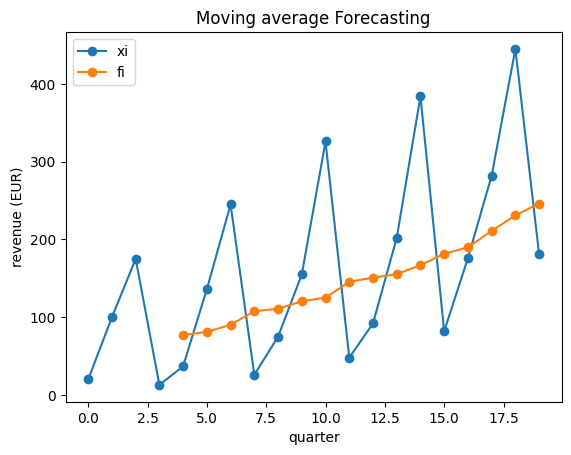

In [55]:
forecast = movingAverageForecasting(4)
predicted = calculatePreviousForecasting(revenues, forecast)
errors = pd.Series(predicted) - revenues
MAE = errors.abs().mean()
print('MAE= ', MAE)
RMSE = math.sqrt((errors ** 2).mean())
print('RMSE= ', RMSE)
MAPE = (errors / revenues).abs().mean()
print('MAPE= ', MAPE)

plt.figure()
plt.plot(range(0, len(revenues)), revenues, 'o-', label='xi')
plt.plot(range(0, len(revenues)), predicted, 'o-', label='fi')
plt.xlabel('quarter')
plt.ylabel('revenue (EUR)')
plt.title('Moving average Forecasting')
plt.legend()
plt.show()

## 3.4 Linear combination forecasting

MAE=  28.269227851395907
RMSE=  32.79290497416407
MAPE=  0.1742833820482184


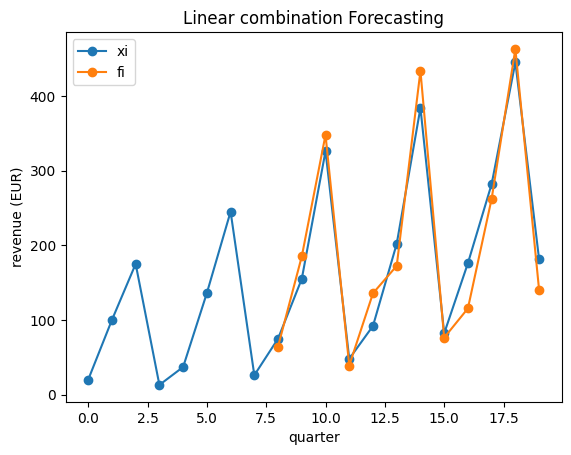

In [18]:
forecast = linearCombinationForecasting(4)
predicted = calculatePreviousForecasting(revenues, forecast)
errors = pd.Series(predicted) - revenues
MAE = errors.abs().mean()
print('MAE= ', MAE)
RMSE = math.sqrt((errors ** 2).mean())
print('RMSE= ', RMSE)
MAPE = (errors / revenues).abs().mean()
print('MAPE= ', MAPE)

plt.figure()
plt.plot(range(0, len(revenues)), revenues, 'o-', label='xi')
plt.plot(range(0, len(revenues)), predicted, 'o-', label='fi')
plt.xlabel('quarter')
plt.ylabel('revenue (EUR)')
plt.title('Linear combination Forecasting')
plt.legend()
plt.show()

# 4 Forecasting based on a model

## 4.1 Trend estimation

282.32105263157894

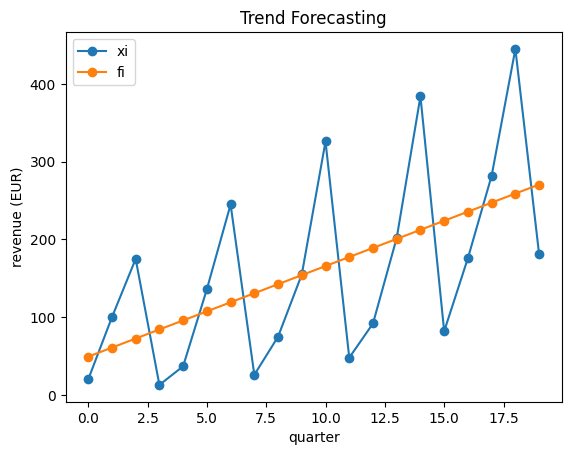

84.99999999999999

100.61668907443115

1.14921088739794

In [20]:
from Week7.fun_regression import *

def trendEstimationModel(past):
    n = len(past)
    x = pd.Series(range(0, n))
    y = pd.Series(past)
    reg = general_regression(x, y, 1)
    return reg.predict

myTrend = trendEstimationModel(revenues)
fc=myTrend(20);display(fc)

predicted = pd.Series(myTrend(range(0, 20)))
plt.figure()
plt.plot(range(0, len(revenues)), revenues, 'o-', label='xi')
plt.plot(range(0, len(revenues)), predicted, 'o-', label='fi')
plt.xlabel('quarter')
plt.ylabel('revenue (EUR)')
plt.title('Trend Forecasting')
plt.legend()
plt.show()

predicted = pd.Series(myTrend(range(0, 20)))
errors = predicted - revenues
MAE = errors.abs().mean();display(MAE)
RMSE = math.sqrt((errors ** 2).mean());display(RMSE)
MAPE = (errors / revenues).abs().mean();display(MAPE)


# 4.2 Seasonal decomposition
## 4.2.1 Auto-correlation - Determining the Season Size

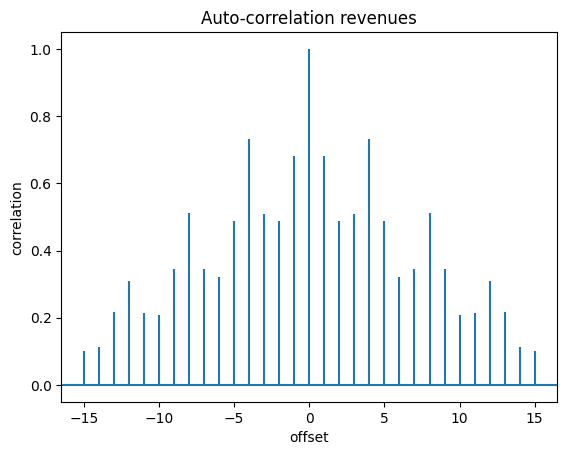

<Figure size 640x480 with 0 Axes>

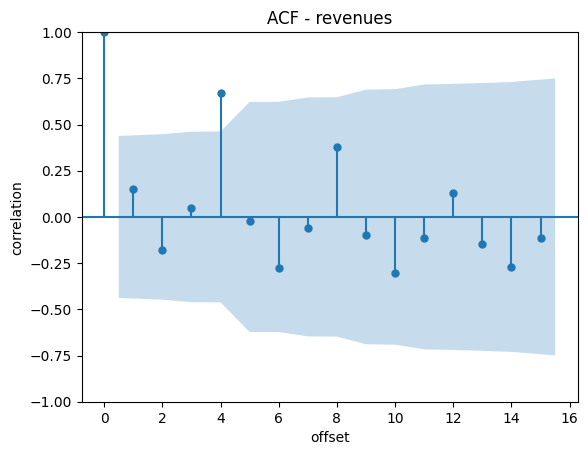

In [31]:
N_lags=15
plt.figure()
plt.acorr(np.array(revenues).astype(float), maxlags=N_lags)
plt.xlabel('offset')
plt.ylabel('correlation')
plt.title('Auto-correlation revenues')
plt.show()
#OR
from statsmodels.graphics.tsaplots import plot_acf

plt.figure()
plot_acf(np.array(revenues).astype(float), lags=N_lags)
plt.xlabel('offset')
plt.ylabel('correlation')
plt.title('ACF - revenues')
plt.show()

## 4.2.3 Determining the trend

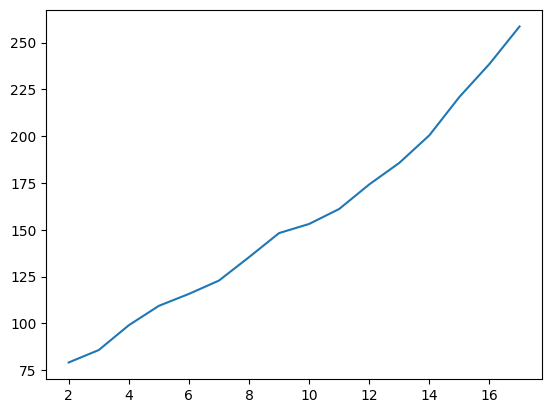

In [35]:
def smooth(x, period):
    result = []
    for i in range(0, len(x) - period + 1):
        result = result + [np.mean(x[i:i + period])]
    return result

def findTrend(x, period):
    result = smooth(x, period)
    nanList = [math.nan] * int(period / 2)
    if (period % 2 == 0):
        result = smooth(result, 2)
    result = nanList + result + nanList
    return result

trend = findTrend(revenues, 4)
plt.plot(trend)


## 4.2.4 Determining the seasonal trend

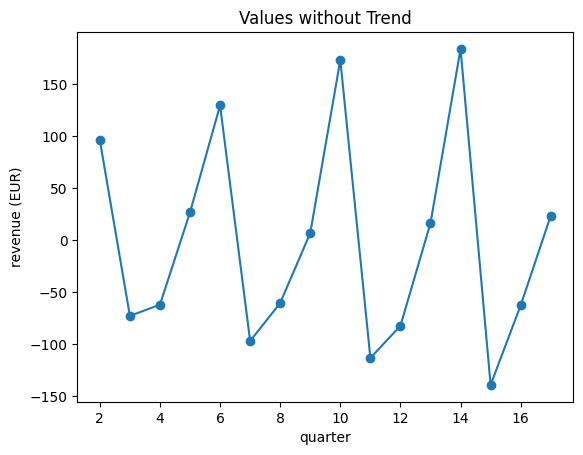

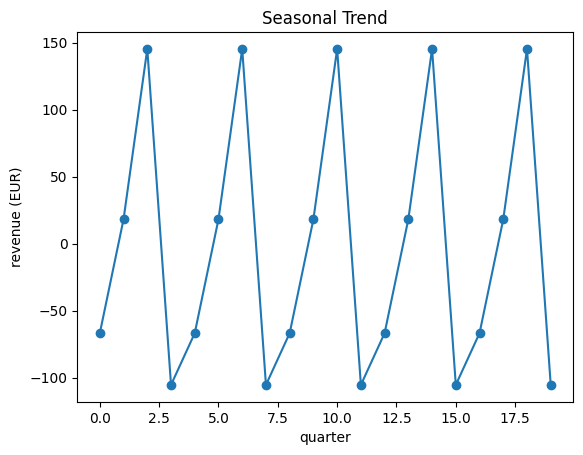

In [36]:
SandR = []
for i in range(0, len(trend)):
    if trend[i] == math.nan:
        SandR = np.append(SandR, math.nan)
    else:
        SandR = np.append(SandR, revenues[i] - trend[i])
# OR
SandR = pd.Series(revenues) - trend

plt.figure()
plt.plot(range(0, len(SandR)), SandR, 'o-')
plt.xlabel('quarter')
plt.ylabel('revenue (EUR)')
plt.title('Values without Trend')
plt.show()

seasonA = SandR[list(range(0, len(SandR), 4))]
seasonB = SandR[list(range(1, len(SandR), 4))]
seasonC = SandR[list(range(2, len(SandR), 4))]
seasonD = SandR[list(range(3, len(SandR), 4))]
seasonA = seasonA[~(np.isnan(seasonA))]
seasonB = seasonB[~(np.isnan(seasonB))]
seasonC = seasonC[~(np.isnan(seasonC))]
seasonD = seasonD[~(np.isnan(seasonD))]
seasonalFactor = [seasonA.mean(), seasonB.mean(), seasonC.mean(), seasonD.mean()]
#BETTER:
period = 4
seasonFactor = []
for i in range(0, period):
    seasonValues = SandR[list(range(i, len(SandR), period))]
    seasonValues = seasonValues[~(np.isnan(seasonValues))]
    seasonFactor = seasonFactor + [seasonValues.mean()]

seasonal = seasonalFactor * (
    int(len(revenues) / 4 + 0.5))  #concatenating seasonal factors to get the seasonalFactor for each quarter
#BETTER:
seasonal = []
for i in range(0, len(revenues)):
    seasonal = seasonal + [seasonFactor[i % period]]

plt.figure()
plt.plot(range(0, len(seasonal)), seasonal, 'o-')
plt.xlabel('quarter')
plt.ylabel('revenue (EUR)')
plt.title('Seasonal Trend')
plt.show()

## 4.2.5 Determine the noise

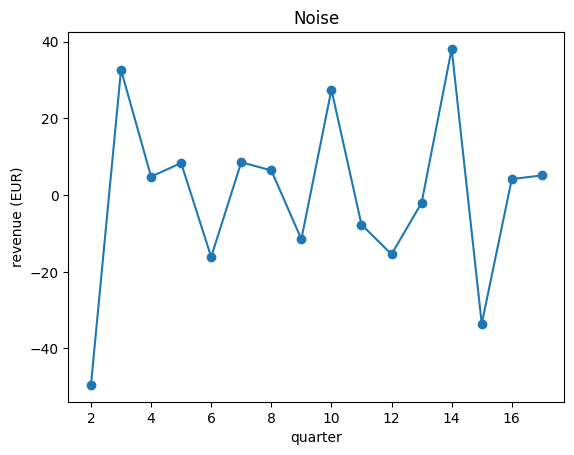

In [37]:
noise = pd.Series(revenues) - trend - seasonal

plt.figure()
plt.plot(range(0, len(noise)), noise, 'o-')
plt.xlabel('quarter')
plt.ylabel('revenue (EUR)')
plt.title('Noise')
plt.show()


### 4.2.6 BIS Reliability based on noise

In [38]:
mae = noise.abs().mean();display(mae)
rsme = math.sqrt((noise ** 2).mean());display(rsme)
mape = (noise / revenues).abs().mean();display(mape)

16.9765625

22.08006559942701

0.28230373684675775

## 4.2.6 TRIS Seasonal decomposition Automated

In [1]:
import statsmodels.tsa.seasonal as smts

result = smts.seasonal_decompose(revenues, model='additive', period=4)
print(result.trend)
print(result.seasonal)
print(result.resid)

plt.figure()
result.plot()
plt.show()

predicted = result.trend + result.seasonal
errors = pd.Series(predicted - revenues)
#OR
errors = pd.Series(result.resid)

MAE = errors.abs().mean()
print('MAE= ', MAE)
RMSE = math.sqrt((errors ** 2).mean())
print('RMSE= ', RMSE)
MAPE = (errors / revenues).abs().mean()
print('MAPE= ', MAPE)


NameError: name 'revenues' is not defined

## 4.3 Forecasting

[linear          7.968091
 quadratic       4.072220
 cubic           2.016231
 Exponential     3.620551
 logarithmic    20.397495
 dtype: float64]

sy                                                 54.334564
se                                                  2.016231
R²                                                  0.998623
predict    <function general_regression.<locals>.<lambda>...
a                                                  50.070823
b                                                  15.328755
c                                                   -0.97679
d                                                   0.046992
dtype: object

array([575.29624684])

array([275.05359836, 394.65339678, 560.28310879, 352.22468643])

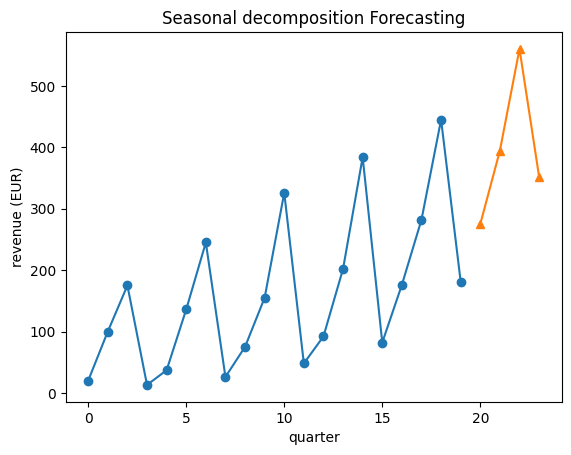

In [40]:
bfR=best_fit_Rsquare(pd.Series(range(2, 18)), pd.Series(trend[2:18]));display(bfR)
#cube has lowest R²
reg = general_regression(pd.Series(range(2, 18)), pd.Series(trend[2:18]), 3);display(reg)

# add a few x-values at the end
tx = 25
predictedtx = reg.predict(range(tx, tx + 1)) + seasonalFactor[tx % 4];display(predictedtx)


predicted = reg.predict(range(20, 24)) + seasonalFactor;display(predicted)

past = np.append(revenues, predicted)

plt.figure()
n = len(revenues)
plt.plot(range(0, n), past[0:n], 'o-')
plt.plot(range(n, len(past)), past[n:len(past)], '^-')
plt.xlabel('quarter')
plt.ylabel('revenue (EUR)')
plt.title('Seasonal decomposition Forecasting')
plt.show()

## Forecasting reliability

In [41]:
predicted = pd.Series(reg.predict(range(0, 20)) + seasonal)
errors = predicted - revenues
MAE = errors.abs().mean();print('MAE= ', MAE)
RMSE = math.sqrt((errors ** 2).mean());print('RMSE= ', RMSE)
MAPE = (errors / revenues).abs().mean();print('MAPE= ', MAPE)

MAE=  17.921789059753436
RMSE=  22.040777539291373
MAPE=  0.3197754747347313


# NOT in slides but in text Chapter on Forecasting

x=  [0, 4, 8, 12, 16]
y=  [20, 37, 75, 92, 176]
x=  [1, 5, 9, 13, 17]
y=  [100, 136, 155, 202, 282]
x=  [2, 6, 10, 14, 18]
y=  [175, 245, 326, 384, 445]
x=  [3, 7, 11, 15, 19]
y=  [13, 26, 48, 82, 181]


[246.6, 362.0000000000002, 498.19999999999993, 279.6000000000003]

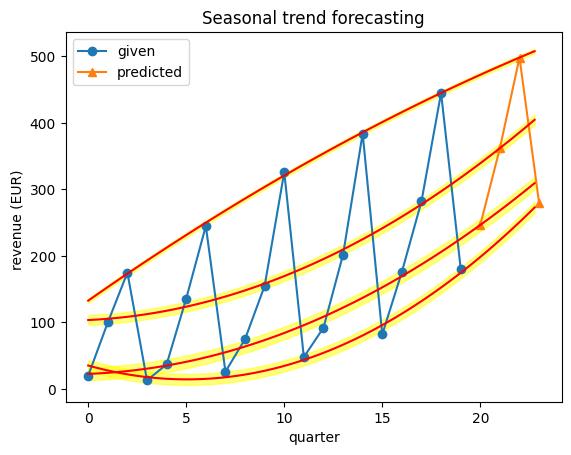

MAE=  6.188571428571423
RMSE=  7.526714327741459
MAPE=  0.09080257845009874


In [45]:
n = len(revenues)
period = 4
for i in range(0, period):
    x = []
    y = []
    for k in range(0, int(math.floor(n - 1 - i) / period) + 1):
        index = i + k * period
        x = x + [index]
        y = y + [revenues[index]]
    print('x= ', x)
    print('y= ', y)


def findRegressionLines(past, period, degree=1, exp=False):
    n = len(past)
    regressionlines = []
    for i in range(0, period):
        x = []
        y = []
        for k in range(0, int(math.floor(n - 1 - i) / period) + 1):
            index = i + k * period
            x = x + [index]
            y = y + [revenues[index]]
        reg = general_regression(pd.Series(x), pd.Series(y), degree, exp=exp)
        regressionlines = regressionlines + [reg]
    return regressionlines


def seasonalTrendForecast(past, period, degree=1, exp=False):
    regressionlines = findRegressionLines(past, period, degree, exp)

    def predict(x):
        predicted = []
        for i in range(0, len(x)):
            y = regressionlines[i % period].predict(x[i])
            predicted = predicted + [y]
        return predicted

    return predict


f = seasonalTrendForecast(revenues, 4, degree=2)

predicted = f(range(20, 24));display(predicted)

regressionlines = findRegressionLines(revenues, 4, degree=2)
plt.figure()
plt.plot(range(0, 20), revenues, 'o-', label='given')
plt.plot(range(20, 24), predicted, '^-', label='predicted')
plt.legend()
plt.xlabel('quarter')
plt.ylabel('revenue (EUR) ')
plt.title('Seasonal trend forecasting')
for i in range(0, period):
    plot_regressionline(regressionlines[i], min=0, max=23)
plt.show()

predicted = f(range(0, 20))
errors = pd.Series(predicted) - revenues
MAE = errors.abs().mean()
print('MAE= ', MAE)
RMSE = math.sqrt((errors ** 2).mean())
print('RMSE= ', RMSE)
MAPE = (errors / revenues).abs().mean()
print('MAPE= ', MAPE)
